In [1]:
import pickle
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 4                             # No. of agents
T = 10
alpha = 0.5                       # Exponent
ENS_step = 1000                    # Ensemble
MC_step = 100+1                     # (Macro) Step
spin_config = ['NH', 'EWH', 'SH']

title_font = {
    'fontsize': 20,
    'fontweight': 'bold'
}
col = ['orange', 'green', 'red']

Text(0.0, 1.0, 'b')

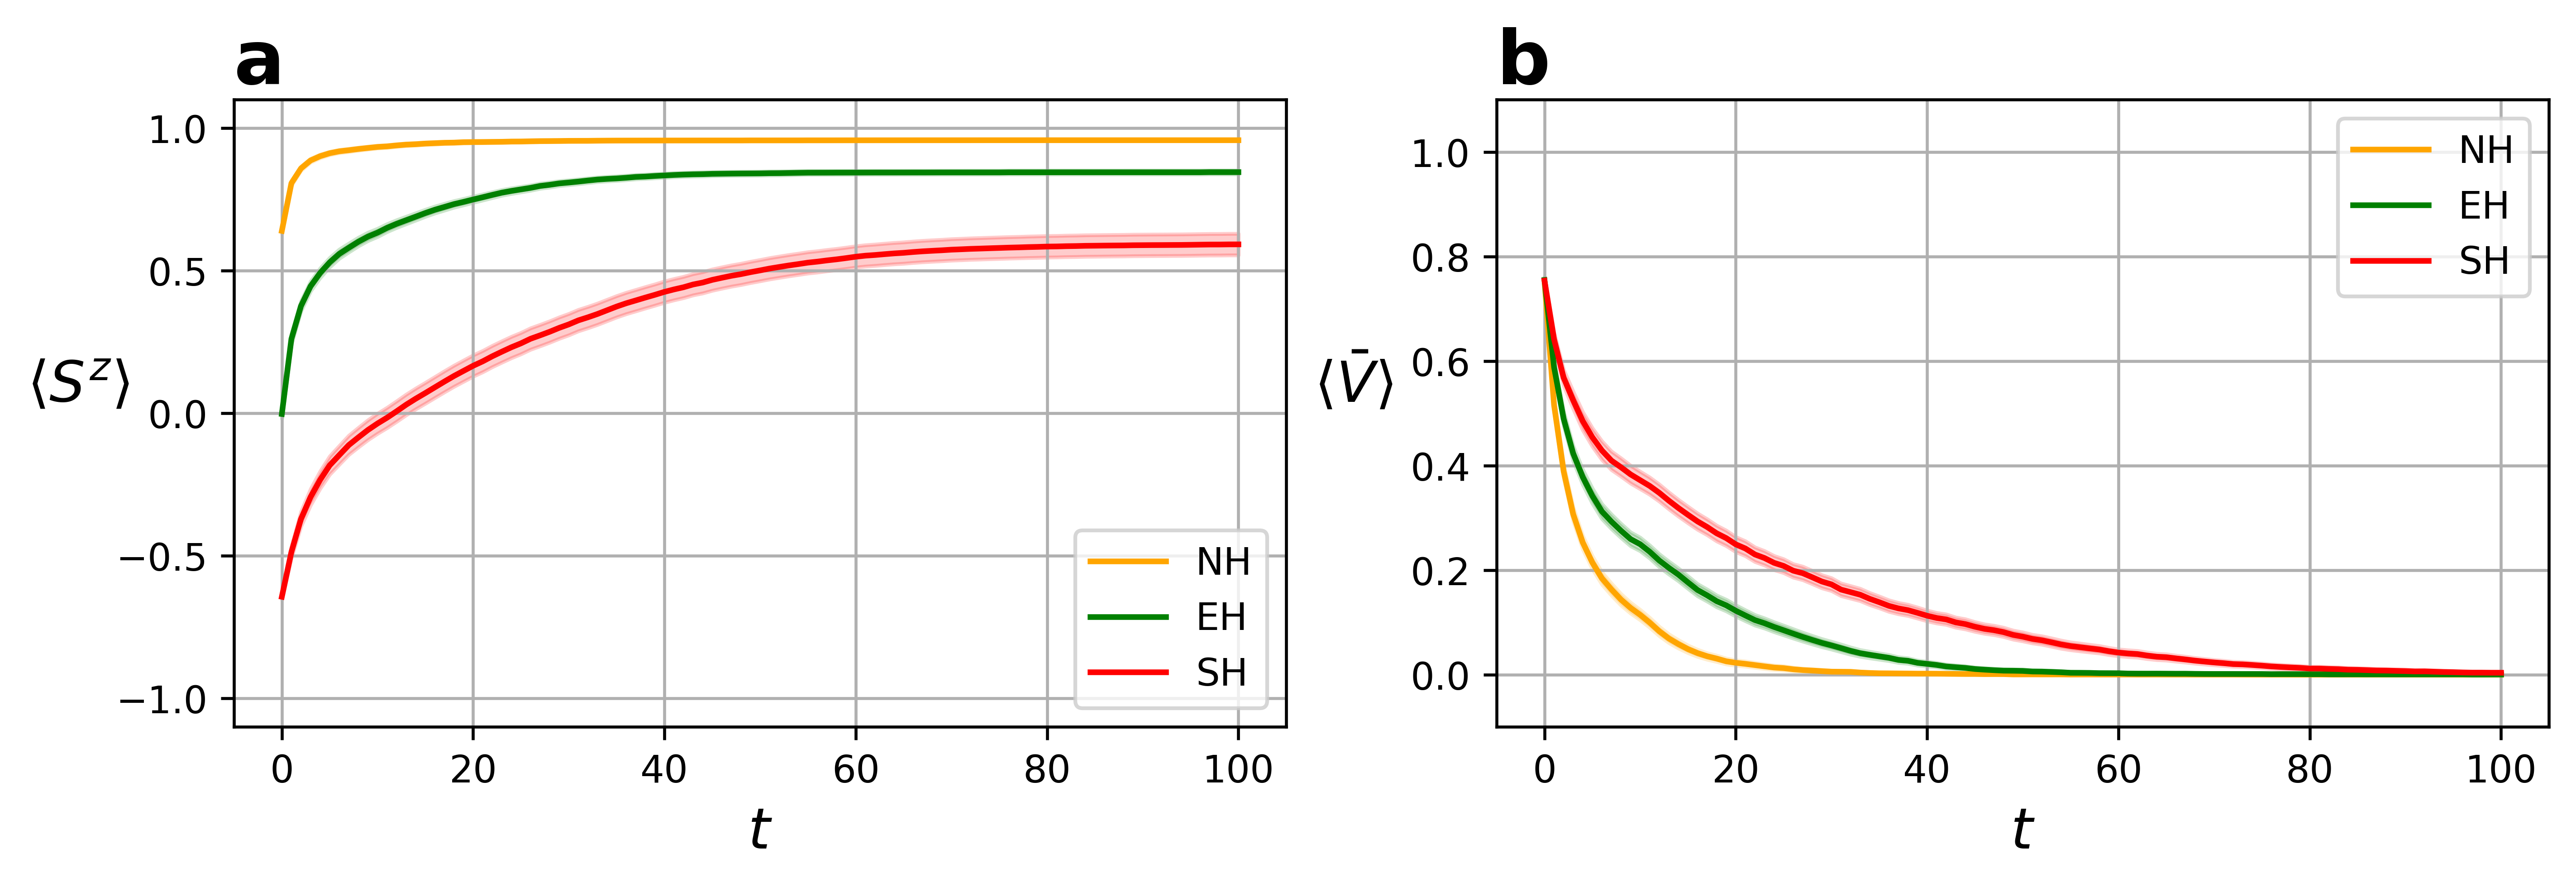

In [3]:
fig,axs = plt.subplots(1,2,figsize=(11,3), dpi=600)

t = np.arange(0, MC_step)

axs[0].set_ylim([-1.1,1.1])
axs[1].set_ylim([-0.1,1.1])

S_array = []
V_array = []

for idx, config in enumerate(spin_config):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))

for i, config in enumerate(spin_config):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([2*np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  if config == 'EWH': config = 'E/WH'
  axs[0].plot(t, Savg, '-', color=col[i])
  axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, color=col[i], alpha = 0.2)
axs[0].set_xlabel(r'$t$', fontsize=15)
axs[0].set_ylabel(r'$\langle S^z \rangle$', fontsize=15, rotation=0, labelpad=10)
axs[0].grid()

for i, config in enumerate(spin_config):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([2*np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[1].plot(t, Vavg, '-', color=col[i])
  axs[1].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=col[i], alpha = 0.2)
axs[1].set_xlabel(r'$t$', fontsize=15)
axs[1].set_ylabel(r'$\langle \bar V \rangle$', fontsize=15, rotation=0, labelpad=15)
axs[1].grid()

for i in [0,1]:
    axs[i].plot(1,1,color='orange', label='NH')
    axs[i].plot(1,1,color='green', label='EH')
    axs[i].plot(1,1,color='red', label='SH')
    axs[i].legend()

axs[0].set_title('a', fontdict=title_font, loc='left', pad=-5)
axs[1].set_title('b', fontdict=title_font, loc='left', pad=-5)

#plt.savefig('FigIC.pdf', bbox_inches = 'tight')